In [25]:
import emoji

# Employee Attrition - Case Study (Data Scientist)

## Business Problem
Attrition is a problem that impacts all businesses and it leads to significant costs for a business, including the cost of business disruption, hiring new staff and training new staff. 

Therefore, businesses, in particular their HR departments have great interest in understanding the drivers of, and minimizing staff attrition. The use of classification models to predict if an employee is likely to quit could greatly increase HR’s ability to intervene on time and remedy the situation to prevent attrition.

## Definition of Attrition
Staff attrition refers to the loss of employees through a natural process, such as retirement, resignation, elimination of a position, personal health, or other similar reasons. With attrition, an employer will not fill the vacancy left by the former employee.

## Dataset
The main data source is the `employee-attrition.csv` file that contains 1470 HR entries.  Given the limited size of the data set, the model should only be expected to provide modest improvement in identification of attrition vs a random allocation of probability of attrition.


| Name | Description |
|------|-------------|
|✔️ AGE| Numerical Value |
|🆕  **age55** | If the worker has more than 54 years of age |
|⭐ ATTRITION|Employee leaving the company (0=no, 1=yes) |
|🔶 BUSINESS TRAVEL|(1=No Travel, 2=Travel Frequently, 3=Tavel Rarely)|
|🆕  **business_travel_cont** | Ordered traveling variable |
|✔️ DAILY RATE|Numerical Value - Salary Level|
|🔶 DEPARTMENT|(1=HR, 2=R&D, 3=Sales)|
|🆕  **Department_gr2** | HR and Sales vs R%D |
|✔️  DISTANCE FROM HOME|Numerical Value - THE DISTANCE FROM WORK TO HOME|
|🔶 EDUCATION | Numerical Value|
|🆕  **education5**| Dichotomical variable 5 vs others |
|🔶 EDUCATION FIELD|(1=HR, 2=LIFE SCIENCES, 3=MARKETING, 4=MEDICAL SCIENCES, 5=OTHERS, 6= TEHCNICAL DEGREE)|
|🆕  EducationField_gr2 | 0 (Life sciences, medical sciences, others) vs 1(MARKETING, HR, TECHNICAL)
|❌ EMPLOYEE COUNT|Numerical Value|
|❌ EMPLOYEE NUMBER|Numerical Value - EMPLOYEE ID|
|✔️ ENVIROMENT SATISFACTION|Numerical Value - SATISFACTION WITH THE ENVIROMENT
|✔️ GENDER|(1=FEMALE, 2=MALE)
|✔️ HOURLY RATE|Numerical Value - HOURLY SALARY
|✔️ JOB INVOLVEMENT|Numerical Value - JOB INVOLVEMENT
|✔️ JOB LEVEL|Numerical Value - LEVEL OF JOB
|🔶 JOB ROLE|(1=HC REP, 2=HR, 3=LAB TECHNICIAN, 4=MANAGER, 5= MANAGING DIRECTOR, 6= REASEARC DIRECTOR, 7= RESEARCH SCIENTIST, 8=SALES EXECUTIEVE, 9= SALES REPRESENTATIVE)|
|🆕  **JobRole_gr2**| 0 ( "Manufacturing Director","Healthcare Representative", "Manager", "Research Director") vs 1 ("Human Resources","Laboratory Technician", "Sales Executive", "Sales Representative","Research Scientist") |
|✔️ JOB SATISFACTION|Numerical Value - SATISFACTION WITH THE JOB|
|🔶 MARITAL STATUS|(1=DIVORCED, 2=MARRIED, 3=SINGLE)|
|✔️ MONTHLY INCOME|Numerical Value - MONTHLY SALARY|
|✔️ MONTHY RATE|Numerical Value - MONTHY RATE|
|🔶 NUMCOMPANIES WORKED|Numerical Value - NO. OF COMPANIES WORKED AT|
|🆕  **NumCompaniesWorked_gr2**| Number of companies worked at > 4|
|❌ OVER 18|(1=YES, 2=NO)|
|✔️OVERTIME|(1=NO, 2=YES)|
|✔️PERCENT SALARY HIKE|Numerical Value - PERCENTAGE INCREASE IN SALARY|
|❌ PERFORMANCE RATING|Numerical Value - PERFORMANCE RATING|
|🔶 RELATIONS SATISFACTION|Numerical Value - RELATIONS SATISFACTION|
|❌ STANDARD HOURS|Numerical Value - STANDARD HOURS|
|🔶  STOCK OPTIONS LEVEL|Numerical Value - STOCK OPTIONS|
|🔶  TOTAL WORKING YEARS|Numerical Value - TOTAL YEARS WORKED|
|✔️TRAINING TIMES LAST YEAR|Numerical Value - HOURS SPENT TRAINING|
|✔️WORK LIFE BALANCE|Numerical Value - TIME SPENT BEWTWEEN WORK AND OUTSIDE|
|✔️YEARS AT COMPANY|Numerical Value - TOTAL NUMBER OF YEARS AT THE COMPNAY|
|✔️YEARS IN CURRENT ROLE|Numerical Value -YEARS IN CURRENT ROLE|
|✔️YEARS SINCE LAST PROMOTION|Numerical Value - LAST PROMOTION|
|✔️YEARS WITH CURRENT MANAGER|Numerical Value - YEARS SPENT WITH CURRENT MANAGER|

# Followed strategy

1. EDA: Exploratory Data Analysis
2. Missing data
3. Normalization
4. Dummy variables
5. Correlations
6. Modeling (Univariate Analysis / Multivariate Analysis):
   1. Logistic regression
   2. Kmeans
   3. Random Forest
   4. Xgboost
   5. LightGB

## Used material and methods

I have used Python 3.9.4 in Visual Studio Code with the next packages:
- pandas_profiling
- sklearn
- numpy
- pandas
- matplotlib
- imblearn

## EDA: Exploratory Data Analysis

I have used a wonderfull package called pandas_profiling to create an html profile of the data. We can check distributions and other information like missing data, correlation between variables and more. 

In [26]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

df = pd.read_csv('../Data/employee-attrition.csv')
df.head()

profile = ProfileReport(df, title="Crayon Attrition Data")
profile.to_file("../Results/EDA_001_attrition.html")
profile.to_notebook_iframe() 

import sweetviz as sv

my_report = sv.analyze(df, target_feat = "Attrition")
my_report2.show_html(filepath='../Results/EDA_002_attrition.html') 
my_report2.show_notebook() 



## EDA analysis

With the exploratory analysis we can conclude several things:
1. The dataset has 1470 rows and 35 columns. There is not any missing data, neither duplicate rows. There are 15 numeric variables, 3 boolean and 17 categorical. 
2. The variable of interest (Attrition) is a litle bit imbalanced with 84% of workers keeping at the company. Just 16% is leaving. I will apply some techniques to increase the confidence of the results. I wanted to implement several techniques but at the end I used the SMOTE oversampling. The other techniques that I would like to test to see the accuracy in the results are: 
   - Random Under-Sampling
   - Random Over-Sampling
   - Random under-sampling with imblearn
   - Random over-sampling with imblearn
   - Under-sampling: Tomek links
   - Synthetic Minority Oversampling Technique (SMOTE)
   - NearMiss
   - Change the performance metric
   - Penalize Algorithms (Cost-Sensitive Training)
   - Change the algorithm
3. There are 3 variables with all the records with the same value. So they will be deleted from any analysis (**EMPLOYEE COUNT**, **OVER 18** and **STANDARD HOURS**). There is also a variable that defines the employee ID (**EMPLOYEE NUMBER**) that doesn't have a lot of meaning if we want to predict. Even there is some IDs that have more attrition rate. **PerformanceRating** is also a variable that I removed because it has two groups but the Attrition rate % is the same in both cases. 
4. I found several minor mistakes in the variables' description. 
   1. **BUSINESS TRAVEL**. Tavel instead of Travel.
   2. **JOB ROLE**. The table had a pipe (|) that didn't let me to read all the list.
   3. **EDUCATION FIELD**. There are some tipos like TEHCNICAL and not finished description. 
    
5. **AGE** variable has a normal distribution and the relationship with the outcome (Attrition) is negatively correlated. There is higher rate in oldest people. It could be because they are retiring. This is why I suggest to create a new variable to identify this group of workers (**age55**). **Age** is correlated with *JobLevel*, *TotalWorkingYears*, *MonthlyIncome* and *YearsAtCompany*.
   
6. **BUSINESS TRAVEL** looks an interesting variable. When a worker doesn't work there is a low probability to leave the company (8%), while if he or she travels something the probability increase almost double (15%) and in the case of travel a lot it arrives to 25%. It is a categorical variable but we have to order it. I created the *business_travel_cont* variable. I will also create dummies for this variable. 
   
7. **DAILY RATE**. I don't see any interesting patter with this variable. I will let like it is. 

8. **DEPARTMENT**. It looks that Human Resources and Sales have more risk. I will create dummies and two groups variable. 

9.  **Distance From Home** looks a continous variable and it is positively correlated with leaving the company. 

10. **Education** in level 5 the stability is bigger. In the other groups it is more complicate to define a pattern. I have created the dummies.

11. **EducationField**. There are two groups: more risky (Marketing, Technical Degree, Human Resources) and the others. I will create two groups variable (*EducationField_gr2*) and dummies. 

13. **EnvironmentSatisfaction** is one of the most clear factor. When the environment satisfaction is not good the risk is much bigger. I have created dummy variables. 

15. **Gender** doesn't look a determinant factor. 

16. **Hourly rate** doesn't look following a pattern. 
    
17. **Job Involvement** has similar pattern to **Environment Satisfaction**. 
    
18. **Job Level** looks also a good indicator. 
    
19. **Job role** have 9 categories. Four of them are high (Sales Executive, Research Scientist, Laboratory Technician and Human Resources) and there is one category with very high risk (Sales representative). I will create a variable with two groups and I will create the dummies for all of them. To avoid multicolineality I will remove the original variable. This variable is related with **Department** and also, but less, with **Job level**.
    
20. **Job satisfaction** is negatively correlated. It is categorical but I will become numeric because there is an ordinal sense. 
    
21. **MaritalStatus** has three categories. Single workers look the most likely to leave. I will create dummy variables. 
    
22. **MonthlyIncome** is a continous variable and it looks negatively correlated with the outcome. 
    
23. **MonthlyRate** has small variance and it is not clear the relationship with the outcome. 
    
24. **NumCompaniesWorked** has a strange pattern. I don't see clearly the pattern when the number of companies are few but I realize that if a worker have been working in more than four companies the leaving risk is high. I will create a variable with two groups (*NumCompaniesWorked_gr2*). 
    
25. **OverTime** is an important factor. The workers with overtime are leaving easier. Exactly three times more. 
   
26. **PercentSalaryHike**. I can't detect any pattern of this variable. 
    
27. **RelationshipSatisfaction**. Those workers with less satisfaction are the most likely to leave.
    
28. **StockOptionLevel** doesn't have a clear patter. 0 and 3 are highs but 1 and 2 are low. I have created dummy variables. 
    
29. **TotalWorkingYears**. In general, there is a negative correlation but at the end there is a higher attrition rate. I think they can be related with the older workers that are retiring. 
    
30. **TrainingTimesLastYear**. There is not a clear pattern but 0 value has a higher risk and 6 the lowest. So I will create dummy variables. 
    
31. **WorkLifeBalance**. The class 1 has the highest risk. Others are similar. I will create dummies. 
    
32. **YearsAtCompany** is negatively correlated with attrition. There are very few workers who spent a lot of years in the company that have high attrition rate. I guess it is people that they are retiring. 
    
33. **YearsInCurrentRole**, **YearsSinceLastPromotion** and **YearsWithCurrManager**. I don't see any clear pattern. 

In [27]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
import time
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV
from sklearn.metrics import classification_report , confusion_matrix ,f1_score,accuracy_score
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier , RandomForestClassifier , StackingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import RFE
import scipy.stats as stats
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
# import squarify
from functions_itu import * 

import warnings
warnings.filterwarnings('ignore')

# Inicio

In [28]:
df = pd.read_csv('../Data/employee-attrition.csv')

In [29]:
SEED = 2022

# Create new variables under condition
df.assign(age55 = 0)

df['age55'] = np.where(df['Age'] >= 55, 1, 0)

# Creating new variables:
# Creating new variables from 3 groups
criteria = ["Non-Travel","Travel_Rarely", "Travel_Frequently"]
values = [1, 2, 3]
df["business_travel_cont"] = df["BusinessTravel"]
df['business_travel_cont'].replace(to_replace=criteria, value=values, inplace=True)


# Department
criteria2 = ["Human Resources","Research & Development", "Sales"]
values2 = [1, 0, 1]
df["Department_gr2"] = df["Department"]
df['Department_gr2'].replace(to_replace=criteria2, value=values2, inplace=True)


# EducationField
criteria3 = ["Human Resources","Marketing","Technical Degree",
             "Medical","Other", "Life Sciences"]
values3 = [1, 1, 1, 0, 0, 0]
df["EducationField_gr2"] = df["EducationField"]
df['EducationField_gr2'].replace(to_replace=criteria3, value=values3, inplace=True)


# Job role
criteria4 = ["Human Resources","Laboratory Technician", "Sales Executive",
             "Sales Representative","Research Scientist", 
             "Manufacturing Director","Healthcare Representative", "Manager", "Research Director"]
values4 = [1,1,1,1,1,
           0,0,0,0]
df["JobRole_gr2"] = df["JobRole"]
df['JobRole_gr2'].replace(to_replace=criteria4, value=values4, inplace=True)


# NumCompaniesWorked
criteria5 = [0,1,2,3,4,5,6,7,8]
values5 = [0,0,0,0,0,
           1,1,1,1]
df["NumCompaniesWorked_gr2"] = df["NumCompaniesWorked"]
df['NumCompaniesWorked_gr2'].replace(to_replace=criteria5, value=values5, inplace=True)

df.assign(education5 = 0)
df['education5'] = np.where(df['Education'] != 5, 1, 0)

# grouping variables

df.drop(['Over18','EmployeeCount','EmployeeNumber','StandardHours'], axis = 1, inplace = True)

cols_cat = ["age55", 'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance', "Department_gr2", "JobRole_gr2",
            "NumCompaniesWorked_gr2", "education5"]
cols_cat_not_ord = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
cols_num = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', "business_travel_cont"]

cols_feat = cols_cat + cols_cat_not_ord + cols_num
col_target = ['Attrition'] # Yes/No

# Total Education Years
education_dict = {
        1: 14, # HighSchool
        2: 16, # College
        3: 20, # Bachelor
        4: 24, # Master
        5: 28  # PhD
    }
df['YearsEducation'] = df['Education'].replace(to_replace = education_dict)
cols_num = cols_num + ['YearsEducation']
cols_feat = cols_cat + cols_cat_not_ord + cols_num

# Total Satisfaction

df['TotalSatisfaction'] = df['EnvironmentSatisfaction'] + df['JobSatisfaction'] +df['RelationshipSatisfaction'] 

cols_num = cols_num + ['TotalSatisfaction']
cols_feat = cols_cat + cols_cat_not_ord + cols_num

# Tranforming categorical variables

le=LabelEncoder()
df['Attrition'] = le.fit_transform(df['Attrition'])
df['BusinessTravel'] = le.fit_transform(df['BusinessTravel'])
df['Department'] = le.fit_transform(df['Department'])
df['EducationField'] = le.fit_transform(df['EducationField'])
df['Gender'] = le.fit_transform(df['Gender'])
df['JobRole'] = le.fit_transform(df['JobRole'])
df['MaritalStatus'] = le.fit_transform(df['MaritalStatus'])
df['OverTime'] = le.fit_transform(df['OverTime'])
df.head()

for col in (cols_cat_not_ord):
    df[col] = df[col].astype('category')


df = pd.get_dummies(df, drop_first = True)

cols_feat = df.columns
cols_feat = [col for col in cols_feat if col not in ['Attrition']]

cols = cols_feat + col_target

cols_feat = [col for col in cols_feat if col not in ['Education', 'YearsInCurrentRole', 'Department_1', 'JobLevel']]

df[cols_num] = MinMaxScaler().fit_transform(df[cols_num])




# Correlations

We should take into account the high correlations to avoid the multicolineality. There is a high correlation in the next cases (bigger than 0.75):

- MonthlyIncome with JobLevel: 0.95
- TotalWorkingYears with JobLevel: 0.782
- TotalWorkingYears with MonthlyIncome: 0.773
- YearsAtCompany with YearsInCurrentRole: 0.759
- YearsAtCompany with YearsWithCurrManager: 0.769
- Travel_Frequently with business_travel_cont: 0.828
- Dep_Sales with Department_gr2: 0.907
- Dep_ResearDeve with Department_gr2: -1.0
- EnvirSatisf_1 with EnvironmentSatisfaction: -0.771
- EnvirSatisf_4 with EnvironmentSatisfaction: 0.772
- JobRole_HR with Dep_Human_Resor: 0.905
- JobRole_SalesExec with Dep_Sales: 0.809
- Stock_0 with Single: 0.791
- Travel_Frequently with Travel_Rarely: -0.753
- Dep_ResearDeve with Dep_Sales: -0.907

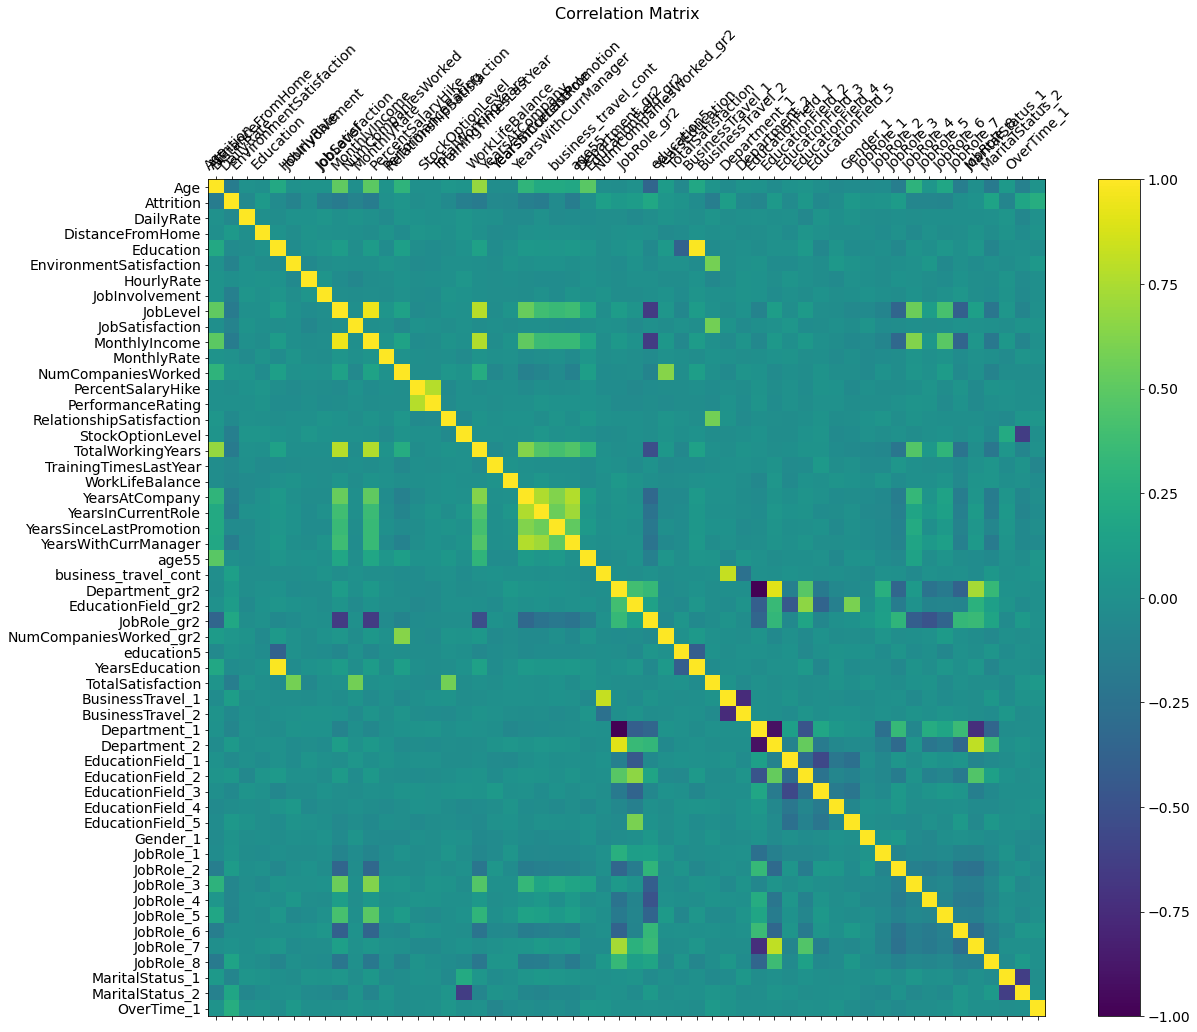

In [30]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [31]:
from functions_itu import matrix_to_xy
import numpy as np

dfcorr = df.corr()
xy = matrix_to_xy(dfcorr, reset_index=True)
print(xy)

x2 = xy.loc[xy["val"] != 1,]
x2 = x2.loc[xy["val"] != -1,]
x3 = x2.loc[(xy["val"] > 0.7) | (xy["val"] < -0.7),]
x3.head

                  row               col       val
0                 Age               Age  1.000000
1                 Age         Attrition -0.159205
2                 Age         DailyRate  0.010661
3                 Age  DistanceFromHome -0.001686
4                 Age         Education  0.208034
...               ...               ...       ...
1480  MaritalStatus_1   MaritalStatus_2 -0.629981
1481  MaritalStatus_1        OverTime_1 -0.013502
1482  MaritalStatus_2   MaritalStatus_2  1.000000
1483  MaritalStatus_2        OverTime_1 -0.006498
1484       OverTime_1        OverTime_1  1.000000

[1485 rows x 3 columns]


<bound method NDFrame.head of                        row                   col       val
237              Education        YearsEducation  0.991817
406               JobLevel         MonthlyIncome  0.950300
413               JobLevel     TotalWorkingYears  0.782208
502          MonthlyIncome     TotalWorkingYears  0.772893
625      PercentSalaryHike     PerformanceRating  0.773550
891         YearsAtCompany    YearsInCurrentRole  0.758754
893         YearsAtCompany  YearsWithCurrManager  0.769212
926     YearsInCurrentRole  YearsWithCurrManager  0.714365
1058  business_travel_cont      BusinessTravel_1  0.827515
1088        Department_gr2          Department_1 -1.000000
1089        Department_gr2          Department_2  0.906818
1102        Department_gr2             JobRole_7  0.733497
1255      BusinessTravel_1      BusinessTravel_2 -0.753092
1296          Department_1          Department_2 -0.906818
1309          Department_1             JobRole_7 -0.733497
1327          Department_2

In [32]:
# Removing after checking correlations
df = df.drop(["MonthlyIncome", "Education","TotalWorkingYears","PercentSalaryHike",
              "YearsInCurrentRole","YearsWithCurrManager","Department_1","Department_2",
              "JobRole_7","BusinessTravel_2", "Department_2","JobRole_7",
              "business_travel_cont"],axis = 1)


# Basic model

I have prepared a function where a dataset is the input and several scores as output. 

 ------------------  NAIVE BAYES ------------------
Accuracy score: 0.8401360544217688
Recall/Sensitivity: 0.2978723404255319
Specificity: 0.9433198380566802
Precision: 0.5
F1 score: 0.3733333333333333
ROCAUC score: 0.6205960892411061
Predicted    0   1
Actual            
0          233  14
1           33  14


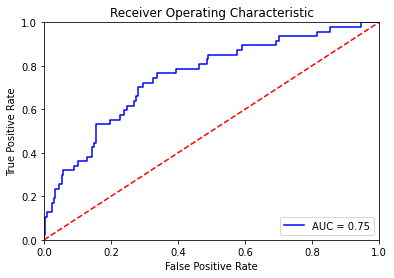

{'acc': 0.8401360544217688, 'recall': 0.2978723404255319, 'spec': 0.9433198380566802, 'prec': 0.5, 'f1': 0.3733333333333333, 'roc': 0.6205960892411061}
 ------------------  LOGISTIC REGRESSION ------------------
Accuracy score: 0.8843537414965986
Recall/Sensitivity: 0.40425531914893614
Specificity: 0.9757085020242915
Precision: 0.76
F1 score: 0.5277777777777778
ROCAUC score: 0.6899819105866138
Predicted    0   1
Actual            
0          241   6
1           28  19


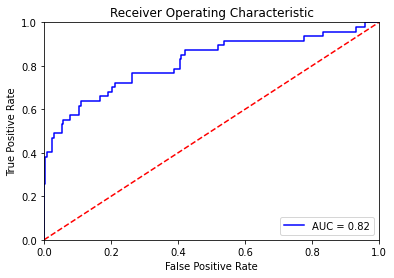

{'acc': 0.8843537414965986, 'recall': 0.40425531914893614, 'spec': 0.9757085020242915, 'prec': 0.76, 'f1': 0.5277777777777778, 'roc': 0.6899819105866138}
 ------------------  KNeighbors ------------------
Accuracy score: 0.8469387755102041
Recall/Sensitivity: 0.10638297872340426
Specificity: 0.9878542510121457
Precision: 0.625
F1 score: 0.1818181818181818
ROCAUC score: 0.547118614867775
Predicted    0  1
Actual           
0          244  3
1           42  5


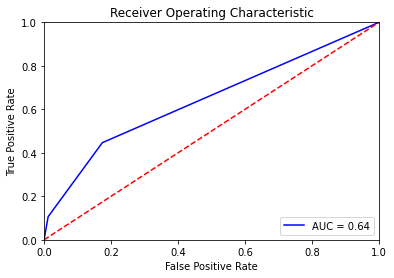

{'acc': 0.8469387755102041, 'recall': 0.10638297872340426, 'spec': 0.9878542510121457, 'prec': 0.625, 'f1': 0.1818181818181818, 'roc': 0.547118614867775}
 ------------------  RandomForestClassifier ------------------
Accuracy score: 0.8673469387755102
Recall/Sensitivity: 0.1702127659574468
Specificity: 1.0
Precision: 1.0
F1 score: 0.2909090909090909
ROCAUC score: 0.5851063829787234
Predicted    0  1
Actual           
0          247  0
1           39  8


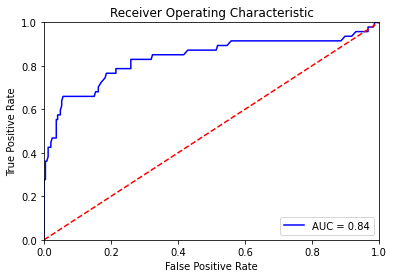

{'acc': 0.8673469387755102, 'recall': 0.1702127659574468, 'spec': 1.0, 'prec': 1.0, 'f1': 0.2909090909090909, 'roc': 0.5851063829787234}
 ------------------  GradientBoostingClassifier ------------------
Accuracy score: 0.8673469387755102
Recall/Sensitivity: 0.40425531914893614
Specificity: 0.9554655870445344
Precision: 0.6333333333333333
F1 score: 0.49350649350649345
ROCAUC score: 0.6798604530967353
Predicted    0   1
Actual            
0          236  11
1           28  19


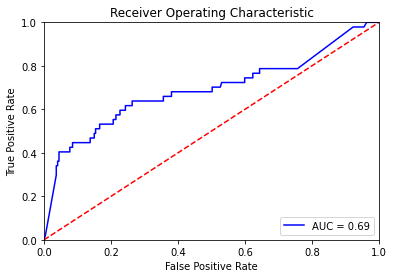

{'acc': 0.8673469387755102, 'recall': 0.40425531914893614, 'spec': 0.9554655870445344, 'prec': 0.6333333333333333, 'f1': 0.49350649350649345, 'roc': 0.6798604530967353}
 ------------------  LGBMClassifier ------------------
Accuracy score: 0.8775510204081632
Recall/Sensitivity: 0.425531914893617
Specificity: 0.9635627530364372
Precision: 0.6896551724137931
F1 score: 0.5263157894736842
ROCAUC score: 0.6945473339650271
Predicted    0   1
Actual            
0          238   9
1           27  20


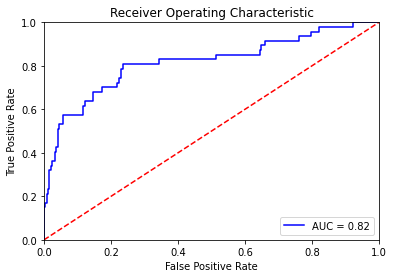

{'acc': 0.8775510204081632, 'recall': 0.425531914893617, 'spec': 0.9635627530364372, 'prec': 0.6896551724137931, 'f1': 0.5263157894736842, 'roc': 0.6945473339650271}
 ------------------  XGBClassifier ------------------
[10:42:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy score: 0.8741496598639455
Recall/Sensitivity: 0.425531914893617
Specificity: 0.9595141700404858
Precision: 0.6666666666666666
F1 score: 0.5194805194805194
ROCAUC score: 0.6925230424670513
Predicted    0   1
Actual            
0          237  10
1           27  20


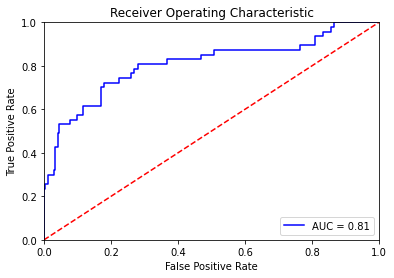

{'acc': 0.8741496598639455, 'recall': 0.425531914893617, 'spec': 0.9595141700404858, 'prec': 0.6666666666666666, 'f1': 0.5194805194805194, 'roc': 0.6925230424670513}
                                 acc    recall      spec      prec        f1  \
Naive Bayes                 0.840136  0.297872  0.943320  0.500000  0.373333   
Log regression              0.884354  0.404255  0.975709  0.760000  0.527778   
KNeighbors                  0.846939  0.106383  0.987854  0.625000  0.181818   
RandomForestClassifier      0.867347  0.170213  1.000000  1.000000  0.290909   
GradientBoostingClassifier  0.867347  0.404255  0.955466  0.633333  0.493506   
Light Gradien Boosting      0.877551  0.425532  0.963563  0.689655  0.526316   
XGB                         0.874150  0.425532  0.959514  0.666667  0.519481   

                                 roc  
Naive Bayes                 0.620596  
Log regression              0.689982  
KNeighbors                  0.547119  
RandomForestClassifier      0.585106 

,acc,recall,spec,prec,f1,roc
Naive Bayes,0.840136,0.297872,0.943320,0.500000,0.373333,0.620596
Log regression,0.884354,0.404255,0.975709,0.760000,0.527778,0.689982
KNeighbors,0.846939,0.106383,0.987854,0.625000,0.181818,0.547119
RandomForestClassifier,0.867347,0.170213,1.000000,1.000000,0.290909,0.585106
GradientBoostingClassifier,0.867347,0.404255,0.955466,0.633333,0.493506,0.679860
Light Gradien Boosting,0.877551,0.425532,0.963563,0.689655,0.526316,0.694547
XGB,0.874150,0.425532,0.959514,0.666667,0.519481,0.692523


In [33]:
from functions_itu import all_model_statistics
%matplotlib inline  

res1 = all_model_statistics(data = df, outcome = "Attrition")
res1


<AxesSubplot:title={'center':'Raw data'}>

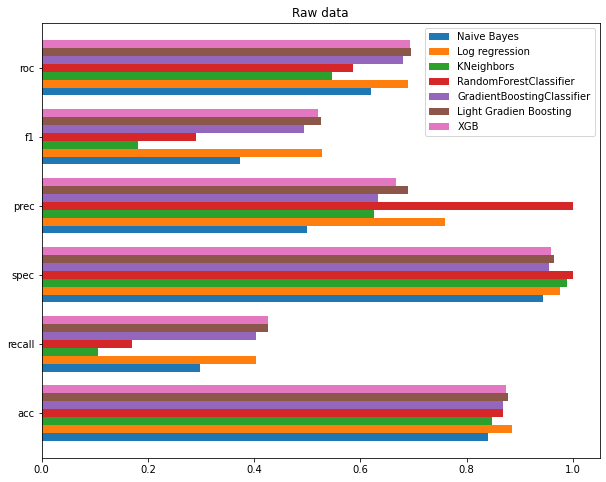

In [34]:
import matplotlib.pyplot as plt

res2 = res1.transpose()
res2
res2.plot.barh(rot=0, width=0.8, title = "Raw data",
               figsize=(10, 8))

# Model 2. Oversampled

I applied SMOTE to oversample the data. 

 ------------------  NAIVE BAYES ------------------
Accuracy score: 0.7348178137651822
Recall/Sensitivity: 0.7813765182186235
Specificity: 0.6882591093117408
Precision: 0.7148148148148148
F1 score: 0.746615087040619
ROCAUC score: 0.7348178137651822
Predicted    0    1
Actual             
0          170   77
1           54  193


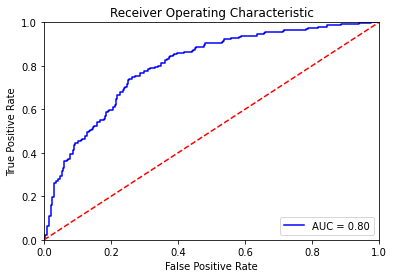

{'acc': 0.7348178137651822, 'recall': 0.7813765182186235, 'spec': 0.6882591093117408, 'prec': 0.7148148148148148, 'f1': 0.746615087040619, 'roc': 0.7348178137651822}
 ------------------  LOGISTIC REGRESSION ------------------
Accuracy score: 0.8987854251012146
Recall/Sensitivity: 0.8582995951417004
Specificity: 0.9392712550607287
Precision: 0.933920704845815
F1 score: 0.8945147679324895
ROCAUC score: 0.8987854251012146
Predicted    0    1
Actual             
0          232   15
1           35  212


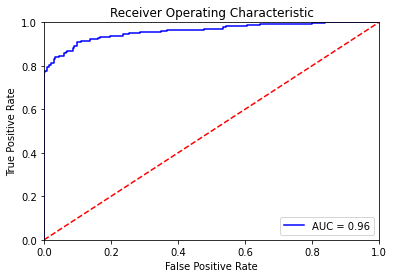

{'acc': 0.8987854251012146, 'recall': 0.8582995951417004, 'spec': 0.9392712550607287, 'prec': 0.933920704845815, 'f1': 0.8945147679324895, 'roc': 0.8987854251012146}
 ------------------  KNeighbors ------------------
Accuracy score: 0.9210526315789473
Recall/Sensitivity: 0.9676113360323887
Specificity: 0.8744939271255061
Precision: 0.8851851851851852
F1 score: 0.9245647969052224
ROCAUC score: 0.9210526315789475
Predicted    0    1
Actual             
0          216   31
1            8  239


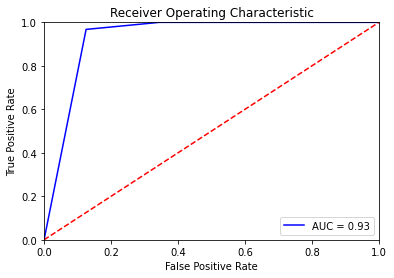

{'acc': 0.9210526315789473, 'recall': 0.9676113360323887, 'spec': 0.8744939271255061, 'prec': 0.8851851851851852, 'f1': 0.9245647969052224, 'roc': 0.9210526315789475}
 ------------------  RandomForestClassifier ------------------
Accuracy score: 0.9331983805668016
Recall/Sensitivity: 0.9230769230769231
Specificity: 0.9433198380566802
Precision: 0.9421487603305785
F1 score: 0.9325153374233129
ROCAUC score: 0.9331983805668017
Predicted    0    1
Actual             
0          233   14
1           19  228


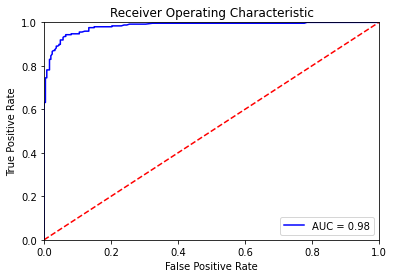

{'acc': 0.9331983805668016, 'recall': 0.9230769230769231, 'spec': 0.9433198380566802, 'prec': 0.9421487603305785, 'f1': 0.9325153374233129, 'roc': 0.9331983805668017}
 ------------------  GradientBoostingClassifier ------------------
Accuracy score: 0.8441295546558705
Recall/Sensitivity: 0.8744939271255061
Specificity: 0.8137651821862348
Precision: 0.8244274809160306
F1 score: 0.8487229862475442
ROCAUC score: 0.8441295546558705
Predicted    0    1
Actual             
0          201   46
1           31  216


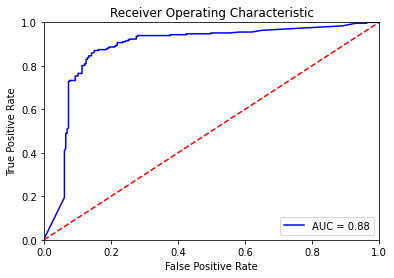

{'acc': 0.8441295546558705, 'recall': 0.8744939271255061, 'spec': 0.8137651821862348, 'prec': 0.8244274809160306, 'f1': 0.8487229862475442, 'roc': 0.8441295546558705}
 ------------------  LGBMClassifier ------------------
Accuracy score: 0.9230769230769231
Recall/Sensitivity: 0.9149797570850202
Specificity: 0.9311740890688259
Precision: 0.9300411522633745
F1 score: 0.9224489795918367
ROCAUC score: 0.923076923076923
Predicted    0    1
Actual             
0          230   17
1           21  226


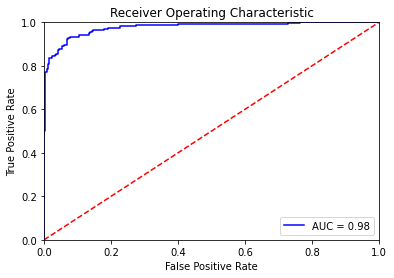

{'acc': 0.9230769230769231, 'recall': 0.9149797570850202, 'spec': 0.9311740890688259, 'prec': 0.9300411522633745, 'f1': 0.9224489795918367, 'roc': 0.923076923076923}
 ------------------  XGBClassifier ------------------
[10:42:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy score: 0.9190283400809717
Recall/Sensitivity: 0.9068825910931174
Specificity: 0.9311740890688259
Precision: 0.9294605809128631
F1 score: 0.918032786885246
ROCAUC score: 0.9190283400809718
Predicted    0    1
Actual             
0          230   17
1           23  224


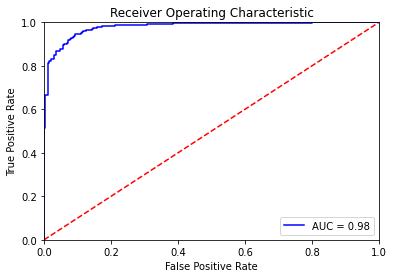

{'acc': 0.9190283400809717, 'recall': 0.9068825910931174, 'spec': 0.9311740890688259, 'prec': 0.9294605809128631, 'f1': 0.918032786885246, 'roc': 0.9190283400809718}
                                 acc    recall      spec      prec        f1  \
Naive Bayes                 0.734818  0.781377  0.688259  0.714815  0.746615   
Log regression              0.898785  0.858300  0.939271  0.933921  0.894515   
KNeighbors                  0.921053  0.967611  0.874494  0.885185  0.924565   
RandomForestClassifier      0.933198  0.923077  0.943320  0.942149  0.932515   
GradientBoostingClassifier  0.844130  0.874494  0.813765  0.824427  0.848723   
Light Gradien Boosting      0.923077  0.914980  0.931174  0.930041  0.922449   
XGB                         0.919028  0.906883  0.931174  0.929461  0.918033   

                                 roc  
Naive Bayes                 0.734818  
Log regression              0.898785  
KNeighbors                  0.921053  
RandomForestClassifier      0.933198 

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'age55', 'Department_gr2',
       'EducationField_gr2', 'JobRole_gr2', 'NumCompaniesWorked_gr2',
       'education5', 'YearsEducation', 'TotalSatisfaction', 'BusinessTravel_1',
       'BusinessTravel_2', 'Department_1', 'Department_2', 'EducationField_1',
       'EducationField_2', 'EducationField_3', 'EducationField_4',
       'EducationField_5', 'Gender_1', 'JobRole_1', 'JobRole_2', 'JobRole_3',
       'JobRole_4', 'JobRole_5', 'JobRole_6', 'JobRole_7', 'JobRole_8',
       'MaritalStatus_1', 'MaritalStatus_2', 'OverTime_1', 'Attrition'],
      dtype='object')

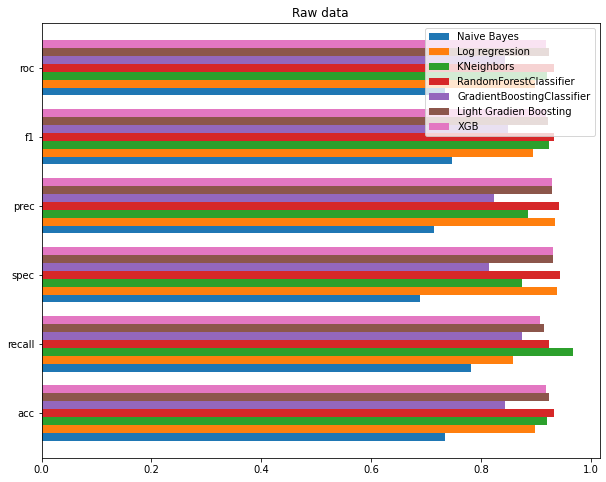

In [35]:
from functions_itu import all_model_statistics, show_results_model
import pandas as pd

cols = list(df.columns)
cols.remove("Attrition")
sampled,target = SMOTE().fit_resample(df[cols],df["Attrition"])

df6 = pd. concat([sampled[cols], target], axis=1) 
res3 = all_model_statistics(data = df6, outcome = "Attrition")
res3

res4 = res3.transpose()
res4.plot.barh(rot=0, width=0.8, title = "Raw data",
               figsize=(10, 8))

df6.columns

# Model 3. Cross validation and Oversampling

For each cross validated dataset I applied oversampling. 

In [36]:
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

col_target = ['Attrition']

X = df.drop('Attrition', axis=1)
y = df['Attrition']

SEED = 2022


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = SEED, stratify = df.Attrition, shuffle = True)

X_train.to_csv('../Data/X_train.csv', index=False)  
X_test.to_csv('../Data/x_test.csv', index=False)  
y_train.to_csv('../Data/y_train.csv', index=False)  
y_test.to_csv('../Data/y_test.csv', index=False)  

model_BY = MultinomialNB()
model_LR = LogisticRegression(random_state = SEED)
model_KNN = KNeighborsClassifier()
model_RF = RandomForestClassifier(random_state = SEED)
model_Light = LGBMClassifier(random_state = SEED)
model_XTree = ExtraTreesClassifier(random_state = SEED)
model_GB = GradientBoostingClassifier(random_state = SEED)


new_data = pd.concat([X_train, y_train], axis=1)
df2 = pd.DataFrame(columns = ['Train','Validation'], 
                  index = ["BY",'LR','KNN', "RF","Light","XTree", "GB"])
performance_df = show_results_model(df2, new_data, col_target[0], 
                                    model_BY, model_LR, model_KNN, model_RF, 
             model_Light, model_XTree, model_GB)

performance_df

Comienza
arg:  MultinomialNB()
kont:  0
X_train.shape:  (1176, 48)
y_train.shape:  (1176,)
(1576, 48)
(1576,)
(236, 48)
(236,)
kont:  0
X_train.shape:  (1176, 48)
y_train.shape:  (1176,)
(1578, 48)
(1578,)
(235, 48)
(235,)
kont:  0
X_train.shape:  (1176, 48)
y_train.shape:  (1176,)
(1578, 48)
(1578,)
(235, 48)
(235,)
kont:  0
X_train.shape:  (1176, 48)
y_train.shape:  (1176,)
(1578, 48)
(1578,)
(235, 48)
(235,)
kont:  0
X_train.shape:  (1176, 48)
y_train.shape:  (1176,)
(1578, 48)
(1578,)
(235, 48)
(235,)
std_val:  0.03
avg_train:  0.758+/-0.01
avg_test:  0.408+/-0.03
arg:  LogisticRegression(random_state=2022)
kont:  0
X_train.shape:  (1176, 48)
y_train.shape:  (1176,)
(1576, 48)
(1576,)
(236, 48)
(236,)
kont:  0
X_train.shape:  (1176, 48)
y_train.shape:  (1176,)
(1578, 48)
(1578,)
(235, 48)
(235,)
kont:  0
X_train.shape:  (1176, 48)
y_train.shape:  (1176,)
(1578, 48)
(1578,)
(235, 48)
(235,)
kont:  0
X_train.shape:  (1176, 48)
y_train.shape:  (1176,)
(1578, 48)
(1578,)
(235, 48)
(235

,Train,Validation
BY,0.758+/-0.01,0.408+/-0.03
LR,0.912+/-0.01,0.529+/-0.1
KNN,0.927+/-0.01,0.373+/-0.05
RF,1.0+/-0.0,0.372+/-0.09
Light,1.0+/-0.0,0.408+/-0.1
XTree,1.0+/-0.0,0.373+/-0.05
GB,0.977+/-0.0,0.488+/-0.09


In [37]:
graph_df = performance_df.reset_index()[['index', 'Validation']]
graph_df.columns = ["Algorithms", "CrossValMeans"]
graph_df["CrossValMeans"] = graph_df['CrossValMeans'].str.split('+').str[0].astype(np.float)
graph_df

,Algorithms,CrossValMeans
0,BY,0.408
1,LR,0.529
2,KNN,0.373
3,RF,0.372
4,Light,0.408
5,XTree,0.373
6,GB,0.488


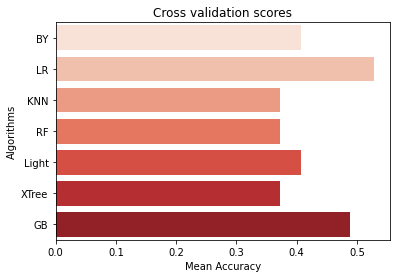

In [38]:
# Plot the performace of all models
import seaborn as sns
g = sns.barplot("CrossValMeans","Algorithms", data = graph_df, palette="Reds",orient = "h")
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

# Tuning the models with hyperparameters

In [39]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
import time
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV
from sklearn.metrics import classification_report , confusion_matrix ,f1_score,accuracy_score
from imblearn.over_sampling import SMOTENC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier , RandomForestClassifier , StackingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import RFE
import scipy.stats as stats
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

In [40]:
# Set the parameters by cross-validation
tuned_parameters = {
    'n_estimators': [140, 175, 200],
    'max_depth': [6, 7, 8],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [1, 2, 3],
    'criterion': ['gini', 'entropy']
}

#Feature Optimization was made and we only kept the best parameters in order to have a faster program.

model = GridSearchCV(model_RF, tuned_parameters, scoring="f1_macro", cv=10)
model.fit(X_train, y_train)

print(model.best_params_)

model_RF = model.best_estimator_
y_true, y_pred = y_test, model_RF.predict(X_test)
print(classification_report(y_true, y_pred))

print('Train:', model_RF.score(X_train, y_train))
print('Test:', model_RF.score(X_test, y_test))

In [41]:
# Set the parameters by cross-validation
tuned_parameters = {
    'n_estimators': [110, 175, 200],
    'max_depth': [6, 7, 8],
    'min_samples_leaf': [1, 2, 3],
    'criterion': ['gini', 'entropy']
}

#Feature Optimization was made and we only kept the best parameters in order to have a faster program.

model = GridSearchCV(model_XTree, tuned_parameters, scoring="f1_macro",cv=10)
model.fit(X_train, y_train)

print(model.best_params_)

model_XTree = model.best_estimator_
y_true, y_pred = y_test, model_XTree.predict(X_test)
print(classification_report(y_true, y_pred))

print('Train:', model_XTree.score(X_train, y_train))
print('Test:', model_XTree.score(X_test, y_test))

In [ ]:
# Set the parameters by cross-validation
tuned_parameters = {
    'n_estimators': [60, 200, 300],
    'max_depth': [2, 3],
    'min_samples_leaf': [1, 2],
    'criterion': ['friedman_mse', 'mse']
}

#Feature Optimization was made and we only kept the best parameters in order to have a faster program.

model = GridSearchCV(model_GB, tuned_parameters, scoring="f1_macro",cv=10)
model.fit(X_train, y_train)

print(model.best_params_)

model_GB = model.best_estimator_
y_true, y_pred = y_test, model_GB.predict(X_test)
print(classification_report(y_true, y_pred))

print('Train:', model_GB.score(X_train, y_train))
print('Test:', model_GB.score(X_test, y_test))

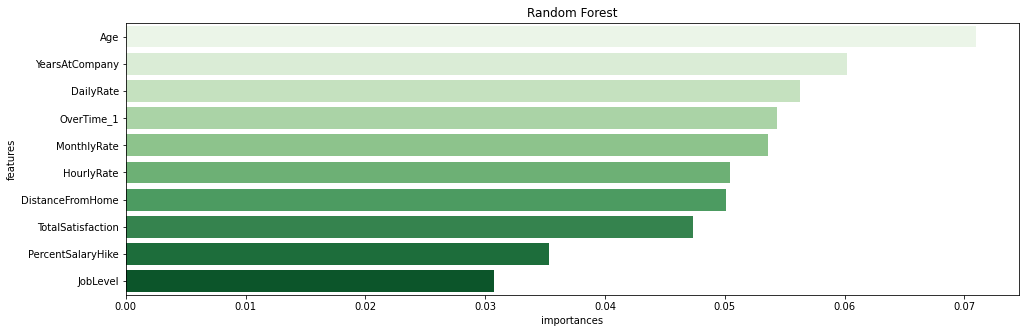

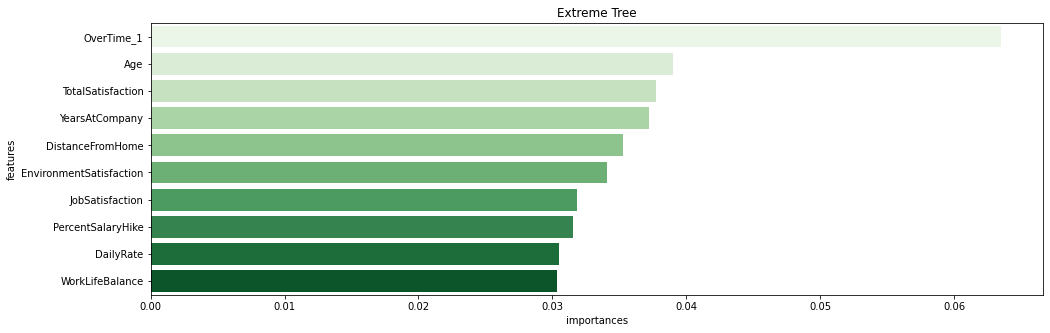

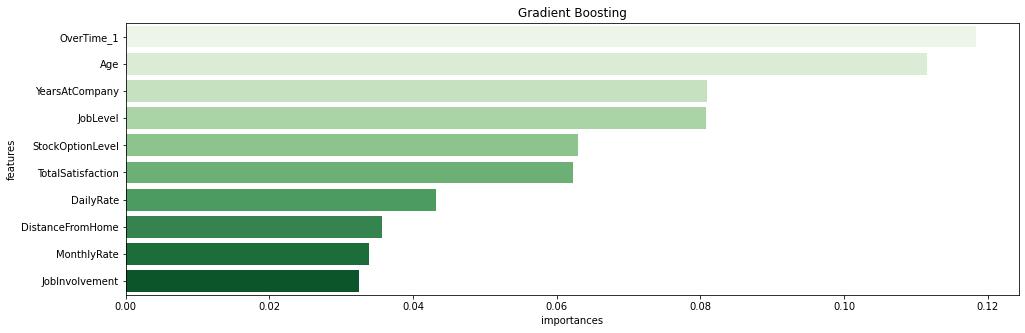

In [42]:
names = ['Random Forest', 'Extreme Tree', 'Gradient Boosting']
models = [model_RF, model_XTree, model_GB]

for i, model in enumerate(models):
    estimator = model.fit(X, y)
    estimator.score(X, y)
    
    importances = model.feature_importances_
    features = X.columns
    data_tuples = list(zip(importances, features))
    data = pd.DataFrame(data_tuples, columns = ['importances', 'features'])
    data = data.sort_values('importances', ascending = False)[:10]
    figure = plt.figure(figsize=(16,5))
    #sns.barplot(x = data['importances'], y = data['features'], palette = 'Greens', orient = 'h').set_title(names[i]);
    ax = sns.barplot(x = data['importances'], y = data['features'], palette = 'Greens', orient = 'h')
    ax.set_title(names[i])

# Importance in Logistic regressión

In [50]:
import numpy as np
import statsmodels.api as sm

import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

# Removing 
X_train_sel = X_train.drop(["EnvironmentSatisfaction", "JobSatisfaction",
              "RelationshipSatisfaction", "Department_gr2","JobRole_gr2",
              "TotalSatisfaction","Department_2",
              "JobRole_1","JobRole_2",
              "JobRole_6","JobRole_7","JobRole_8",
              
              "JobRole_5", "JobRole_3",
              "EducationField_5", "EducationField_2","NumCompaniesWorked_gr2",
              "PercentSalaryHike","PerformanceRating",
              "MonthlyRate","HourlyRate",
              "DailyRate",
              
              "MaritalStatus_1", "JobRole_4",
              "EducationField_gr2", "education5", "TrainingTimesLastYear"],axis = 1)

model = sm.Logit(y_train, X_train_sel)
result = model.fit(method='newton')
result.params
result.predict(X_train_sel)
(result.predict(X_train_sel) >= 0.5).astype(int)
print(result.pred_table())
result.summary()

Optimization terminated successfully.
         Current function value: 0.308342
         Iterations 8
[[957.  29.]
 [109.  81.]]


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1176
Model:                          Logit   Df Residuals:                     1155
Method:                           MLE   Df Model:                           20
Date:                Fri, 04 Feb 2022   Pseudo R-squ.:                  0.3028
Time:                        10:47:59   Log-Likelihood:                -362.61
converged:                       True   LL-Null:                       -520.09
Covariance Type:            nonrobust   LLR p-value:                 7.031e-55
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Age                        -2.4636      0.637     -3.868      0.000      -3.712      -1.215
DistanceFromHome            1.2398      0.327      3.794      0.000       0.599       1.880
Education                   1.1914      0.451      2.640      0.008       0.307       2.076
JobInvolvement             -0.7447      0.128     -5.811      0.000      -0.996      -0.494
JobLevel                   -0.5825      0.148     -3.927      0.000      -0.873      -0.292
NumCompaniesWorked          1.3751      0.367      3.748      0.000       0.656       2.094
StockOptionLevel           -0.3009      0.172     -1.745      0.081      -0.639       0.037
WorkLifeBalance            -0.4314      0.123     -3.505      0.000      -0.673      -0.190
YearsAtCompany             -3.6599      1.219     -3.004      0.003      -6.048      -1.272
YearsSinceLastPromotion     3.1534      0.670      4.709      0.000       1.841       4.466
age55                       1.3475      0.541      2.493      0.013       0.288       2.407
YearsEducation             -4.4743      1.805     -2.479      0.013      -8.012      -0.936
BusinessTravel_1            1.7019      0.409      4.162      0.000       0.900       2.503
BusinessTravel_2            0.7712      0.376      2.050      0.040       0.034       1.509
Department_1               -0.5387      0.218     -2.470      0.014      -0.966      -0.111
EducationField_1           -0.6739      0.252     -2.674      0.008      -1.168      -0.180
EducationField_3           -0.8694      0.275     -3.160      0.002      -1.409      -0.330
EducationField_4           -1.2462      0.500     -2.491      0.013      -2.227      -0.266
Gender_1                    0.4837      0.197      2.452      0.014       0.097       0.870
MaritalStatus_2             0.9861      0.270      3.658      0.000       0.458       1.514
OverTime_1                  1.8701      0.204      9.161      0.000       1.470       2.270
===========================================================================================
"""

# Importance of the variables

|                    | RF | ExtreTree | Gradient Boostig |
| ------------------ | -- | --------- | ---------------- |
| **Age**                | 1  | 8         | 2                |
| **OverTime**           | 2  | 1         | 1                |
| **Years at Company**   | 3  | 9         | 3                |
| Daily Rate         | 4  |           | 7                |
| Total Satisfaction | 5  | 4         |                  |
| Monthrly Rate      | 6  |           | 9                |
| Distance From Home | 7  |           | 8                |
| Hourly Rate        | 8  |           |                  |
| StockOptionsLevel  | 9  | 6         | 5                |
| Job Level          | 10 | 7         | 4                |
| Marital Status     |    | 2         |                  |
| Job Role\_gr       |    | 3         |                  |
| JobInvolment       |    | 10        | 10               |
| Total Satisfaction |    |           | 6                |

In [33]:
base_learners = [('RF', model_RF),
                 ('XT', model_XTree),
                 ('GB', model_GB)
                  ]

    
meta_learner = MLPClassifier(hidden_layer_sizes=(16, 16), random_state=SEED,early_stopping=True)

final_model = StackingClassifier(estimators = base_learners, final_estimator = meta_learner).fit(X_train, y_train)

In [34]:
stacked_pred = final_model.predict(X_test)

In [35]:
print(classification_report(y_test, stacked_pred, target_names = ['Stay', 'Leave']))

              precision    recall  f1-score   support

        Stay       0.89      0.96      0.92       247
       Leave       0.64      0.38      0.48        47

    accuracy                           0.87       294
   macro avg       0.77      0.67      0.70       294
weighted avg       0.85      0.87      0.85       294



In [36]:
confusion_matrix(y_test,stacked_pred)

array([[237,  10],
       [ 29,  18]], dtype=int64)


## How we could improve our prediction

In general I would like to have a feedback from a stakholder of the company to know several things that could explain some particularities of the data. 

1. If we could collect more information during more time we could improve our prediction. 
2. If we could know where the company is, we could collect more extra information about unemployment and other variables, like when this attritions happened. In this way we could incorporate a temporal dimension. It could help us to be more accurate. 
3. It is not the same leaving a company because of going to another company or because of retiring. Maybe there is a pre-retiring politic in the company and we don't know. It would be very interesting to have information about the retirement plan and the target of the poeple who leaves the company.
4. Or is it a decission of the company. Are they eliminating positions because of a crisis, restructuring?
5. I don't know if there is information about death. People of 55 are not old but they could have health problems. 
6. Are they all leavings? or maybe sometimes there are dismissals?
7. Depends on the social situation finding a new job is different. So knowing the company, the sector and the country can influence a lot in the interpretation of the data. 
8. Companies can use exit interviews to find out why employees are leaving and the problems they encountered in the workplace.